In [3]:
import numpy as np
import math
from munkres import Munkres
from matplotlib import pyplot as plt

### Equations ressort avec frottements

$\frac{d^2V}{dt^2} = -kV - F\frac{dV}{dt}$

In [4]:
T = 100
dt = 1

In [5]:
def compute_ressort(T, dt, V_0, V_1, F, k, Vmin, Vmax, noise=False, sigma=0):
    V = np.zeros((T, ))
    V[0] = V_0
    V[1] = V_1
    for t in range(2, T):
        V[t] = -dt**2*(k*V[t-1]) + 2*V[t-1] - V[t-2] - dt*F*(V[t-1] - V[t-2])
        if noise:
            V[t] += np.random.normal(0, sigma)
        if V[t] < Vmin:
            F = - F
        elif V[t] > Vmax:
            F= - F
    return V

In [6]:
V1 = compute_ressort(T, dt, V_0=1, V_1=2, F=0.1, k=1, Vmin=0.05, Vmax=2)

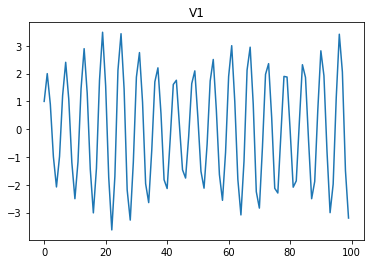

In [8]:
plt.plot(range(T), V1)
plt.title('V1')
plt.show()

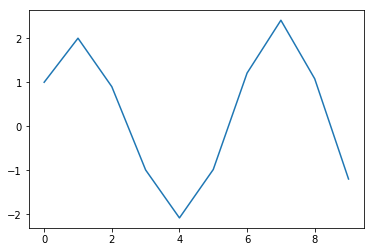

In [9]:
plt.plot(range(10), V1[:10])
plt.show()

In [10]:
V2 = compute_ressort(T, dt, V_0=1, V_1=2, F=0.1, k=1, Vmin=0.05, Vmax=2, noise=True, sigma=0.1)

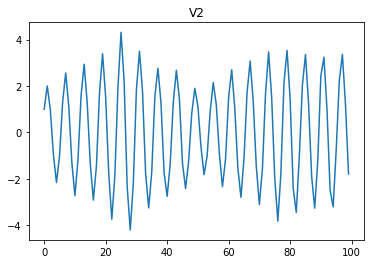

In [11]:
plt.plot(range(T), V2)
plt.title('V2')
plt.show()

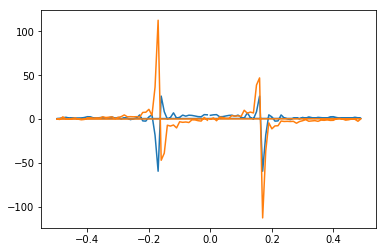

In [12]:
sp = np.fft.fft(V2)
freq = np.fft.fftfreq(T, dt)
plt.plot(freq, sp.real, freq, sp.imag)
plt.show()

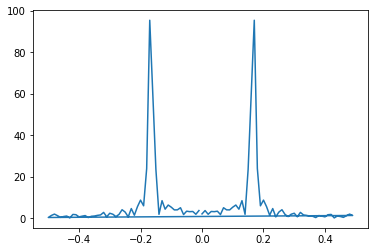

In [224]:
plt.plot(freq, abs(sp))
plt.show()

In [248]:
def autocorr(x, t=1):
    np.corrcoef(np.array([x[0:len(x)-t], x[t:len(x)]]))

In [262]:
def desciptor(V):
    signal = abs(np.fft.fft(V))
    freq = np.fft.fftfreq(len(V))
    fr_max = freq[np.argmax(signal)]
    return np.array([np.mean(V), np.std(V), fr_max, np.max(signal)])

In [263]:
desc1 = desciptor(V1)
desc2 = desciptor(V2)

In [265]:
dist = np.linalg.norm(desc1 - desc2)
dist

29.663370606855995